# IFN646 - Biomedical Data Science &#151; Wearables Project

## Import of necessary packages

In [1]:
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from preprocess import load_data, inform, __handle_missing_values
import warnings

# create image directory
from pathlib import Path
Path("img").mkdir(parents=True, exist_ok=True)
warnings.filterwarnings('ignore')

## Load the data

In [2]:
full, train, test = load_data()

Loading cached files.


## Print statistics of the datasets

In [3]:
print("Full data:")
inform(full)
print("Training data:")
inform(train)
print("Test data:")
inform(test)

Full data:
Shape of data: (49100, 5)
There are 90.74% 0 values in column 'Actiware classification'.
There are 92.14 0 values in column 'Actiwatch activity counts'.
Training data:
Shape of data: (40761, 5)
There are 91.03% 0 values in column 'Actiware classification'.
There are 92.13 0 values in column 'Actiwatch activity counts'.
Test data:
Shape of data: (8339, 5)
There are 89.29% 0 values in column 'Actiware classification'.
There are 92.18 0 values in column 'Actiwatch activity counts'.


## Gain overview of data

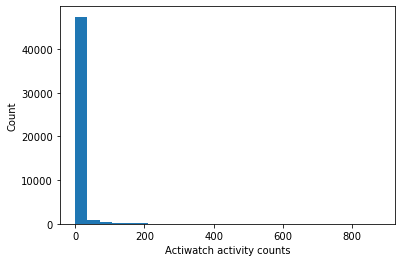

In [4]:
# plot histogram of Actiwatch activity counts for the whole data set
plt.hist(full['Actiwatch activity counts'], bins=25)
plt.ylabel('Count')
plt.xlabel('Actiwatch activity counts');
plt.savefig('img/actiwatch_histogram.pdf', bbox='tight') 

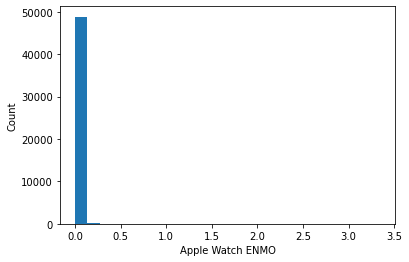

In [5]:
# plot histogram of Apple Watch ENMO for the whole data set
plt.hist(full['Apple Watch ENMO'], bins=25)
plt.ylabel('Count')
plt.xlabel('Apple Watch ENMO');
plt.savefig('img/apple_watch_histogram.pdf', bbox='tight') 

## Function to calculate total counts according to Philips’ Actiware software specification

In [6]:
def total_counts(df, src_col, dest_col):
    day = df['day'].values
    cts = df[src_col].values    
    total = []
    for i in range(len(cts)):
        div_by_25_sum = 0
        div_by_5_sum = 0
        for j in range(-8, -4):
            if i + j >= 0 and day[i + j] == day[i]:
                div_by_25_sum += cts[i + j]
        for j in range(-4, 0):
            if i + j >= 0 and day[i + j] == day[i]:
                div_by_5_sum += cts[i + j]
        for j in range(1, 5):
            if i + j < len(cts) and day[i + j] == day[i]:
                div_by_5_sum += cts[i + j]
        for j in range(5, 9):
            if i + j < len(cts) and day[i + j] == day[i]:
                div_by_25_sum += cts[i + j]
        calculation = 0.04 * div_by_25_sum + 0.20 * div_by_5_sum + 4.00 * cts[i]
        total.append(calculation)
    df[dest_col] = total

In [7]:
# call total_counts function and add a column for total counts from Actiwatch
total_counts(train, 'Actiwatch activity counts', 'Actiwatch Total Counts')

# print first 30 items
train.head(30)

,day,Actiwatch activity counts,Actiware classification,Apple Watch ENMO,time,Actiwatch Total Counts
1,1,109.0,1.0,0.227648,20:58:15,555.20
2,1,170.0,1.0,0.217089,20:58:30,812.40
3,1,91.0,1.0,0.267528,20:58:45,548.68
4,1,101.0,1.0,0.222397,20:59:00,607.12
5,1,125.0,1.0,0.262205,20:59:15,727.64
6,1,105.0,1.0,0.283417,20:59:30,673.96
7,1,176.0,1.0,0.314253,20:59:45,954.84
8,1,105.0,1.0,0.328872,21:00:00,689.72
9,1,159.0,1.0,0.444264,21:00:15,897.32
10,1,215.0,1.0,0.521921,21:00:30,1110.12


## Helper functions that classifies into sleep/wake according to threshold 40

In [8]:
def classify(row, col):
    if row[col] > 40:
        return 1
    else:
        return 0

# Plausibility Check

## Perform classification of actiwatch total counts for plausibility check

In [9]:
train['Actiware classification calculated'] = train.apply(lambda x: classify(x, 'Actiwatch Total Counts'), axis=1)

# set uninterrupted sleep values
train = __handle_missing_values(train, 'Actiware classification calculated')

#print first 30 elements
train.head(30)


    0 rows were dropped where both activity counts and classification were missing.
    That is roughly 0.00% of the dataset.

    1125 classifications were set to 1 for the first and last 5 minutes of uninterrupted sleep.
    That is roughly 2.76% of the dataset.


,day,Actiwatch activity counts,Actiware classification,Apple Watch ENMO,time,Actiwatch Total Counts,Actiware classification calculated
1,1,109.0,1.0,0.227648,20:58:15,555.20,1
2,1,170.0,1.0,0.217089,20:58:30,812.40,1
3,1,91.0,1.0,0.267528,20:58:45,548.68,1
4,1,101.0,1.0,0.222397,20:59:00,607.12,1
5,1,125.0,1.0,0.262205,20:59:15,727.64,1
6,1,105.0,1.0,0.283417,20:59:30,673.96,1
7,1,176.0,1.0,0.314253,20:59:45,954.84,1
8,1,105.0,1.0,0.328872,21:00:00,689.72,1
9,1,159.0,1.0,0.444264,21:00:15,897.32,1
10,1,215.0,1.0,0.521921,21:00:30,1110.12,1


## Compare classification to calculated classification

In [10]:
classification_stats = train.groupby(["Actiware classification", "Actiware classification calculated"]).size()
print(classification_stats)

Actiware classification  Actiware classification calculated
0.0                      0                                     37106
1.0                      0                                        19
                         1                                      3632
dtype: int64


The plausibility check in which we re-classified the sleep/wake state according to Philip's software specification almost yielded a perfect result. Merely 19 values are misclassified. This might be due to some NA values handled improperly or a bug in the uninterrupted sleep algorithm. We will investigate that further in the next iteration.

# Fit Machine Learning Model

## Draw scatter plot from Apple Watch and Actiwatch

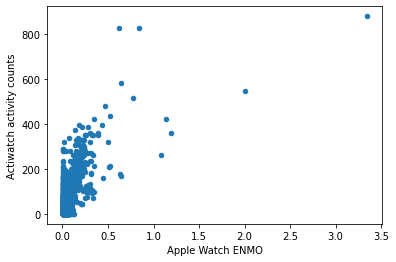

In [11]:
train.plot.scatter(x='Apple Watch ENMO', y='Actiwatch activity counts')
plt.savefig('img/scatter_plot.pdf', bbox='tight') 

## Fit linear Regression Model

The function of the regression line is:
f(x) = 830.1 x - 1.774


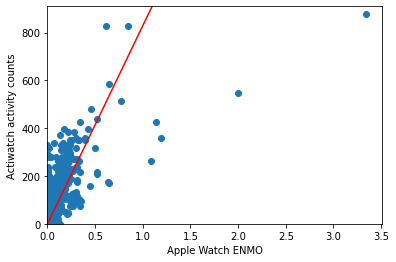

In [12]:
# declare x and y for the model
x = train['Apple Watch ENMO']
y = train['Actiwatch activity counts']

x.fillna(0, inplace=True)
y.fillna(0, inplace=True)
x = x.tolist()
y = y.tolist()

x_removed_high_values = []
y_removed_high_values = []

# only focus on finding a regression line for smaller values, as high activity
# counts are likely to be awake anyway
for i in range(len(x)):
    if y[i] < 160:
        x_removed_high_values.append(x[i])
        y_removed_high_values.append(y[i])

# fit linear model
model = numpy.poly1d(numpy.polyfit(x_removed_high_values, y_removed_high_values, 1))

# create linspace to draw scatter plot in next step
line = numpy.linspace(0, 3.5, 1000)

# scatter plot
plt.scatter(x, y)

# draw regression graph into plot
plt.plot(line, model(line), color='red')

# set limits
plt.xlim([0,3.51])
plt.ylim([0,910])

# set labels
plt.xlabel("Apple Watch ENMO")
plt.ylabel("Actiwatch activity counts")

plt.savefig('img/scatter_plot_with_regression_line.pdf', bbox='tight') 

print('The function of the regression line is:\nf(x) =', str(model).strip())

## Predict if sleep or awake for test data

In [13]:
# predict activity counts
test['Predicted activity counts'] = model(test['Apple Watch ENMO'])

# calculate total counts from prediction
total_counts(test, 'Predicted activity counts', 'Predicted Total Counts')

# print first 15 rows
test.head(15)

,day,Actiwatch activity counts,Actiware classification,Apple Watch ENMO,time,Predicted activity counts,Predicted Total Counts
7789,5,91.0,1.0,0.049485,22:11:15,39.301102,442.111665
7790,5,62.0,1.0,0.047339,22:11:30,37.520075,450.677075
7791,5,58.0,1.0,0.069403,22:11:45,55.834148,530.042896
7792,5,154.0,1.0,1.066049,22:12:00,883.105176,3673.955762
7793,5,164.0,1.0,0.503060,22:12:15,415.792924,1898.819150
7794,5,159.0,1.0,0.117267,22:12:30,95.563985,675.876534
7795,5,94.0,1.0,0.075325,22:12:45,60.749480,537.821826
7796,5,0.0,1.0,0.003893,22:13:00,1.457241,303.842708
7797,5,6.0,1.0,0.006534,22:13:15,3.649144,171.210781
7798,5,0.0,1.0,0.003435,22:13:30,1.076835,93.540957


In [14]:
# classify
test['Predicted wake'] = test.apply(lambda x: classify(x, 'Predicted Total Counts'), axis=1)

# set uninterrupted sleep values
test = __handle_missing_values(test, 'Predicted wake')

# print first 15 rows
test.head(15)


    0 rows were dropped where both activity counts and classification were missing.
    That is roughly 0.00% of the dataset.

    273 classifications were set to 1 for the first and last 5 minutes of uninterrupted sleep.
    That is roughly 3.27% of the dataset.


,day,Actiwatch activity counts,Actiware classification,Apple Watch ENMO,time,Predicted activity counts,Predicted Total Counts,Predicted wake
7789,5,91.0,1.0,0.049485,22:11:15,39.301102,442.111665,1
7790,5,62.0,1.0,0.047339,22:11:30,37.520075,450.677075,1
7791,5,58.0,1.0,0.069403,22:11:45,55.834148,530.042896,1
7792,5,154.0,1.0,1.066049,22:12:00,883.105176,3673.955762,1
7793,5,164.0,1.0,0.503060,22:12:15,415.792924,1898.819150,1
7794,5,159.0,1.0,0.117267,22:12:30,95.563985,675.876534,1
7795,5,94.0,1.0,0.075325,22:12:45,60.749480,537.821826,1
7796,5,0.0,1.0,0.003893,22:13:00,1.457241,303.842708,1
7797,5,6.0,1.0,0.006534,22:13:15,3.649144,171.210781,1
7798,5,0.0,1.0,0.003435,22:13:30,1.076835,93.540957,1


## Print statistics of classification

### Confusion matrix

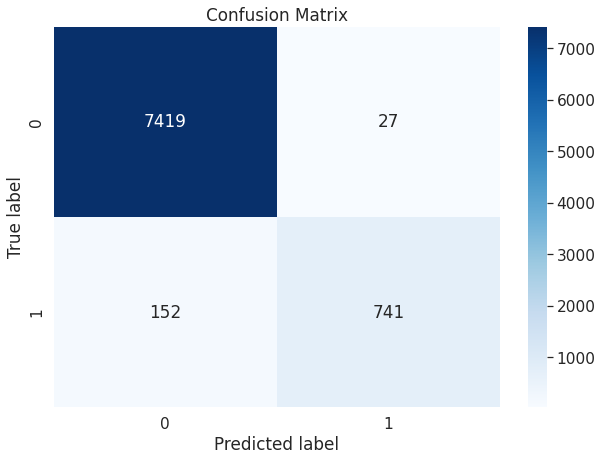

In [15]:
# create matrix
conf_mat = confusion_matrix(test['Actiware classification'], test['Predicted wake'])

# put matrix into data frame
df_cm = pd.DataFrame(conf_mat, range(2), range(2))

# plot matrix with blues color style
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) 

s = sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
s.set(xlabel='Predicted label', ylabel='True label', title='Confusion Matrix')

fig = s.get_figure()
fig.savefig("img/confusion_matrix.pdf", bbox='tight') 

### Metrics: Accuracy, Misclassification Rate, Precision, Recall, F1-score

#### Note: As we are trying to classify sleep, we consider 0 as the positive class

In [16]:
# Accuracy
acc = round(accuracy_score(test['Actiware classification'], test['Predicted wake'])*100, 2)
print("Accuracy score: \t", acc, '%')

# Misclassification Rate
print("Misclassification rate:\t", round(100-acc, 2), '%')

# Precision
print("Precision score:\t", 
      round(precision_score(test['Actiware classification'], test['Predicted wake'], pos_label=0)*100, 2), '%')
        
# Recall
print("Recall: \t\t", 
      round(recall_score(test['Actiware classification'], test['Predicted wake'], pos_label=0)*100, 2), '%')

# F1-Score
print("F1 score: \t\t", 
      round(f1_score(test['Actiware classification'], test['Predicted wake'], pos_label=0)*100, 2), '%')

Accuracy score: 	 97.85 %
Misclassification rate:	 2.15 %
Precision score:	 97.99 %
Recall: 		 99.64 %
F1 score: 		 98.81 %


### Further metrics like total sleep time, awakenings during night

In [17]:
# extract days
days = test['day'].unique()

# consider every day separately
for day in days:
    subset = test[test['day'] == day]
    
    # calc fall asleep time for actiware
    fall_asleep_id_acti = subset['Actiware classification'].idxmin()
    
    # calc wake up time for actiware
    wake_up_id_acti = subset.iloc[::-1]['Actiware classification'].idxmin()+1
    
    # calc sleep time for actiware
    sleep_time_acti = (wake_up_id_acti - fall_asleep_id_acti) / 4 / 60
    
    # calc fall asleep time for predicted
    fall_asleep_id_pred = subset['Predicted wake'].idxmin()
    
    # calc wake up time for predicted
    wake_up_id_pred = subset.iloc[::-1]['Predicted wake'].idxmin()+1
    
    # calc sleep time for predicted
    sleep_time_pred = (wake_up_id_pred - fall_asleep_id_pred) / 4 / 60
    
    
    # calc awakenings during night for actiware
    awakening_ids = []
    for i in range(fall_asleep_id_acti, wake_up_id_acti):
        if subset.loc[i]['Actiware classification'] == 1:
            awakening_ids.append(i)
    distinct_awakenings = 0
    for i in range(1, len(awakening_ids)):
        if awakening_ids[i-1] != awakening_ids[i]-1:
            distinct_awakenings += 1
    awakenings_acti = distinct_awakenings
    
    # calc awakenings during night for predicted
    awakening_ids = []
    for i in range(fall_asleep_id_pred, wake_up_id_pred):
        if subset.loc[i]['Predicted wake'] == 1:
            awakening_ids.append(i)
    distinct_awakenings = 0
    for i in range(1, len(awakening_ids)):
        if awakening_ids[i-1] != awakening_ids[i]-1:
            distinct_awakenings += 1
    awakenings_pred = distinct_awakenings
    
    print("day", day, ": \t", "sleep time:\t", round(sleep_time_acti, 2), 
          "h  \t", "pred. sleep time:\t", round(sleep_time_pred, 2), "h ")
    print("\t\t awakenings:\t", awakenings_acti, "\t\t pred. awakenings:\t", awakenings_pred)
    
    print()
    


day 5 : 	 sleep time:	 6.75 h  	 pred. sleep time:	 6.78 h 
		 awakenings:	 18 		 pred. awakenings:	 18

day 14 : 	 sleep time:	 8.57 h  	 pred. sleep time:	 8.58 h 
		 awakenings:	 59 		 pred. awakenings:	 50

day 15 : 	 sleep time:	 5.5 h  	 pred. sleep time:	 5.52 h 
		 awakenings:	 33 		 pred. awakenings:	 36

day 17 : 	 sleep time:	 6.78 h  	 pred. sleep time:	 6.83 h 
		 awakenings:	 24 		 pred. awakenings:	 22

day 25 : 	 sleep time:	 5.85 h  	 pred. sleep time:	 5.83 h 
		 awakenings:	 44 		 pred. awakenings:	 40

